# Notebook 26-(website performance analysis project)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
#loading dataset-

df=pd.read_csv(r"C:\Users\Prince Chandravat\Downloads\data-export (1).csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# Cleaning data columns -

In [122]:
#0th row as heading column-
df.columns=df.iloc[0] 
df=df.drop(index=0).reset_index(drop=True)  #drop 1st row  (beacause sames as 0th row)

#renaming column name-
df.columns=['Channel group', 'Datehour', 'Users', 'Sessions', 'Engaged Sessions', 'Average engagement time per session', 'Engaged session per user', 'Events per session', 'Engagement rate', 'Event count']
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


# Data overview-

In [123]:
df.shape

(3182, 10)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel group                        3182 non-null   object
 1   Datehour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged session per user             3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [125]:
df.describe()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024041719,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [126]:
df.columns.unique()

Index(['Channel group', 'Datehour', 'Users', 'Sessions', 'Engaged Sessions',
       'Average engagement time per session', 'Engaged session per user',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object')

## Drop Duplicates-

In [127]:
df.drop_duplicates()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel group                        3182 non-null   object
 1   Datehour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged session per user             3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


## Typecatsing-

In [129]:
# Datehour column to date -
df['Datehour']=pd.to_datetime(df['Datehour'],format='%Y%m%d%H', errors='coerce')
df.head(1)

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402


In [130]:
#Convert all the columns in numerical except of channel group & datehour- 

numeric_column=df.columns.drop(['Channel group','Datehour'])   
df[numeric_column]=df[numeric_column].apply(pd.to_numeric,errors='coerce') #convert string to integer.
df['Hour']=df['Datehour'].dt.hour  #create a hour column for hours.
df.head()

,Channel group,Datehour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel group                        3182 non-null   object        
 1   Datehour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged session per user             3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [132]:
df.describe()

,Datehour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged session per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [133]:
df.isnull().sum()  #data have no null value-

Channel group                          0
Datehour                               0
Users                                  0
Sessions                               0
Engaged Sessions                       0
Average engagement time per session    0
Engaged session per user               0
Events per session                     0
Engagement rate                        0
Event count                            0
Hour                                   0
dtype: int64

# Session and user over time-

<Axes: xlabel='Datehour'>

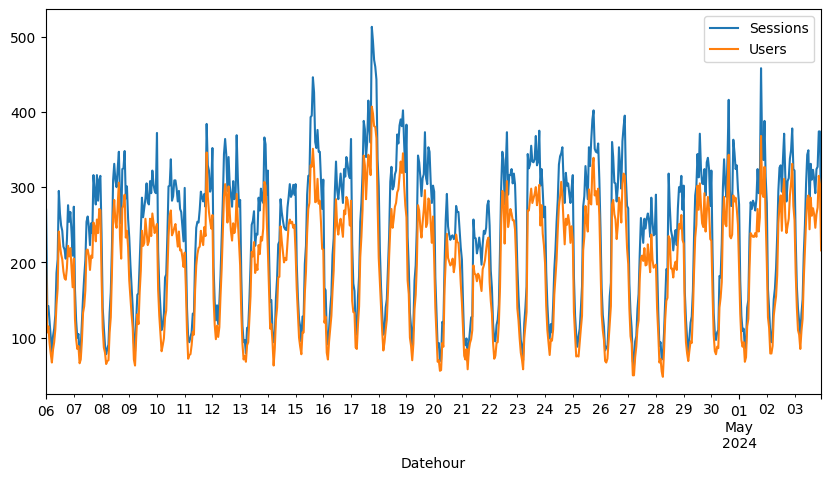

In [134]:
#figure size of chart-
plt.figure(figsize=(10,5))

df.groupby('Datehour')[['Sessions','Users']].sum().plot(ax=plt.gca())

# Total users by channel-

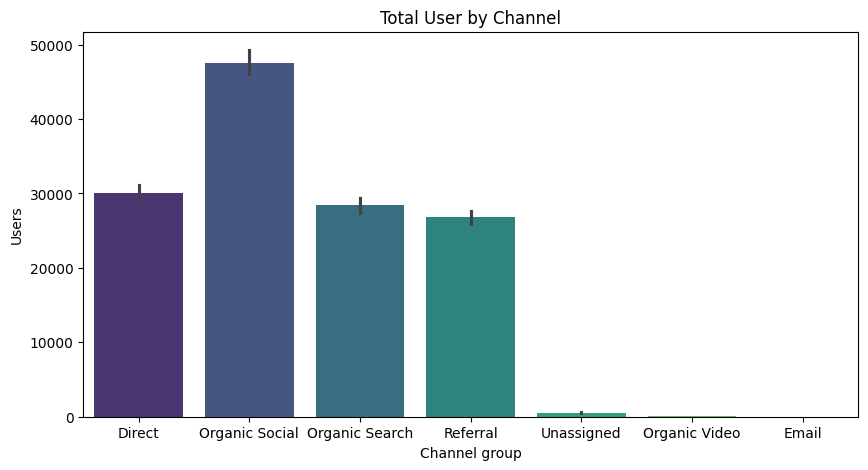

In [135]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Channel group',y='Users',estimator=np.sum,palette='viridis',hue='Channel group')
plt.title('Total User by Channel')
plt.show()

# Average Engagement Time By Channel-

C:\Users\Prince Chandravat\AppData\Local\Temp\ipykernel_29344\4282516508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Channel group',y='Average engagement time per session',estimator=np.mean,palette='deep')


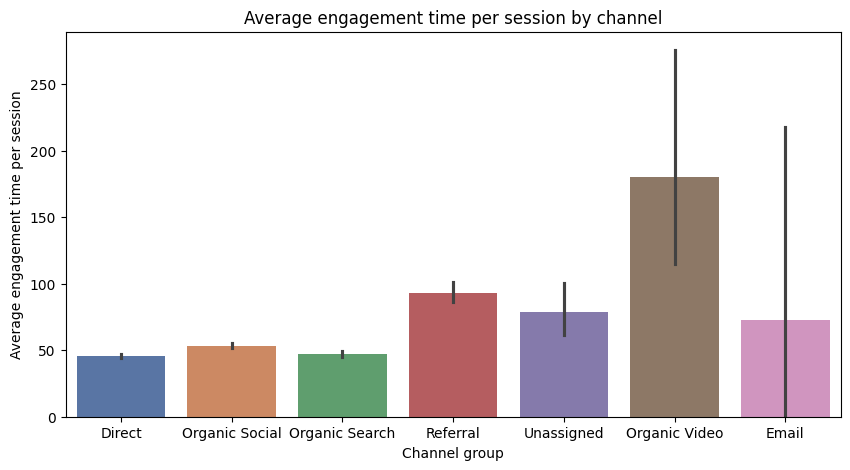

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Channel group',y='Average engagement time per session',estimator=np.mean,palette='deep')
plt.title('Average engagement time per session by channel')
plt.show()

# Engagement Rate Distribution By Channel-

C:\Users\Prince Chandravat\AppData\Local\Temp\ipykernel_29344\3445391469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Channel group',y='Engagement rate',palette='ocean')


<Axes: xlabel='Channel group', ylabel='Engagement rate'>

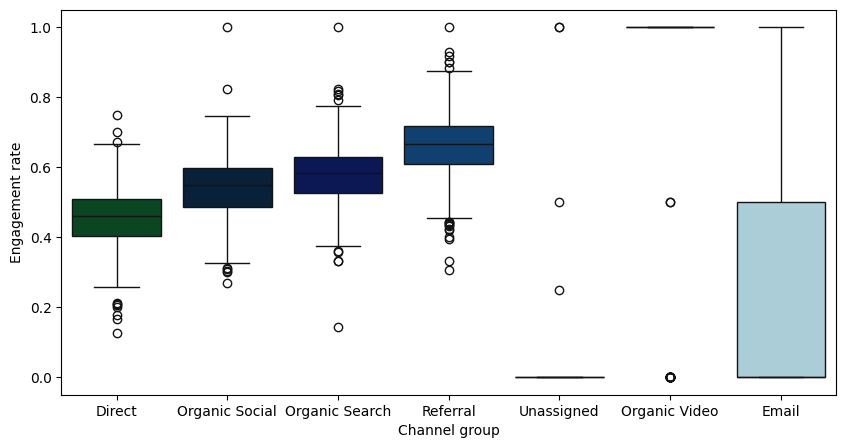

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='Channel group',y='Engagement rate',palette='ocean')

# Traffic by hour and channel-

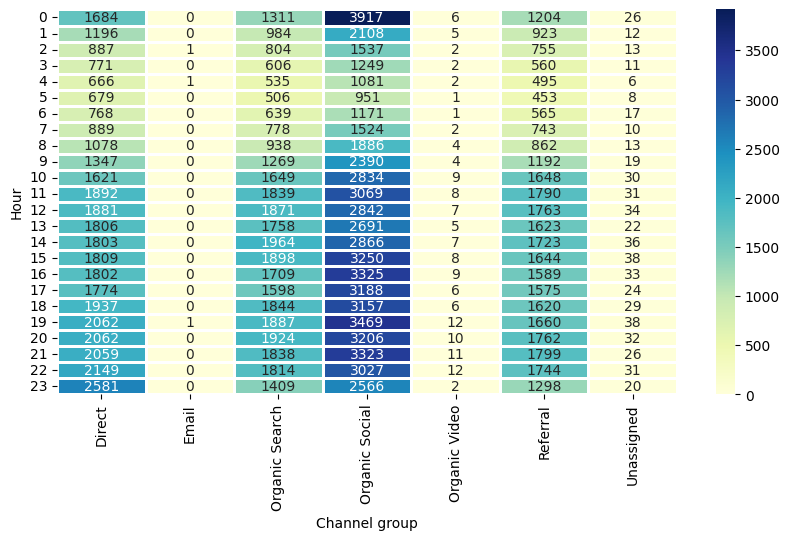

In [146]:
heatmap_data=df.groupby(['Hour','Channel group'])['Sessions'].sum().unstack().fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data,cmap='YlGnBu',linewidth=0.8,annot=True,fmt='.0f')
plt.show()

# Engagement rate Vs Session Over time

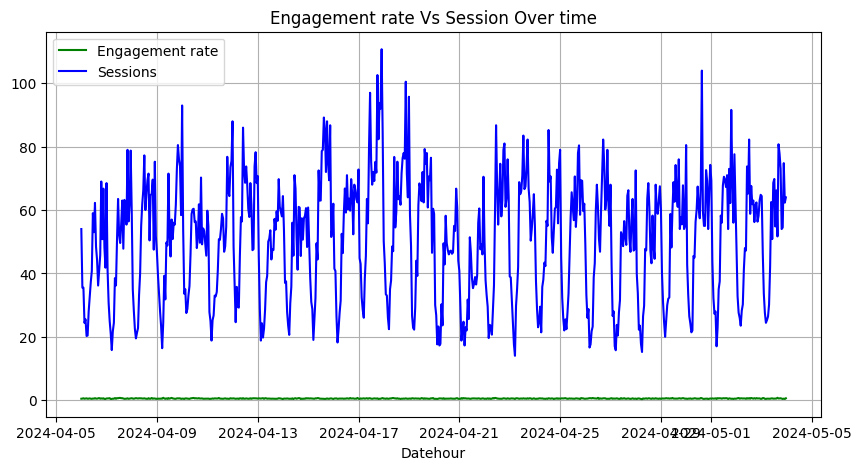

In [153]:
df_2=df.groupby('Datehour')[['Engagement rate', 'Sessions']].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_2['Datehour'],df_2['Engagement rate'],label='Engagement rate', color='green')
plt.plot(df_2['Datehour'],df_2['Sessions'],label='Sessions', color='blue')
plt.title('Engagement rate Vs Session Over time')
plt.legend()
plt.xlabel('Datehour')
plt.grid(True)
plt.show()